In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [5]:
%matplotlib inline

from pathlib import Path

In [6]:
from attila.util.config import get_env
from attila.util.plots import plot_history, plot_preds
from attila.util.io import load_pickle, append_rows2text, load_json, get_summary, dirs
from attila.experiments.tools import experiment2tex, runs2tex

In [7]:
_here = Path('.').resolve()

In [9]:
config, data_path, out_path, models_config_path = get_env(_here)

In [11]:
model_folder = Path('~/_tmp/_martin/').expanduser(
summary = get_summary(model_folder), config)

In [129]:
import numpy as np
from keras import backend as K
from attila.nn.metrics import mean_IoU, DSC 


mets = mean_IoU()(
    K.cast(summary['preds'][1], dtype='float32'),
    K.cast(summary['preds'][2], dtype='float32'),
)
mets

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([0.9039235 , 0.88433385, 0.8870278 , 0.8820586 , 0.86383533,
       0.8877835 , 0.8870278 , 0.89529914], dtype=float32)>

In [49]:
name, stats = experiment2tex(summary)
stats['attila_metrics_mean_IoU']['all'].shape

(28, 324)

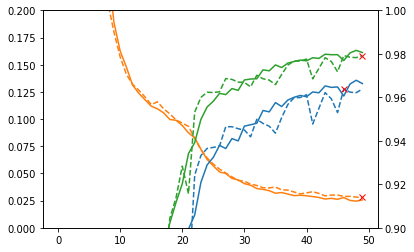

In [42]:
plot_history(
    summary['history'],
    loss_scale=[0, 0.2], met_scale=[0.9, 1]
)

In [38]:
plot_preds(
    summary['preds'],
    config.get('image', 'cmap'),
    out_folder=model_folder
)

pred img saved in /home/stefano/_tmp/_martin/pred_0.png
pred img saved in /home/stefano/_tmp/_martin/pred_1.png
pred img saved in /home/stefano/_tmp/_martin/pred_2.png
pred img saved in /home/stefano/_tmp/_martin/pred_3.png
pred img saved in /home/stefano/_tmp/_martin/pred_4.png
pred img saved in /home/stefano/_tmp/_martin/pred_5.png
pred img saved in /home/stefano/_tmp/_martin/pred_6.png
pred img saved in /home/stefano/_tmp/_martin/pred_7.png
